In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-dataset/placement.csv


# Steps

1. Preprocess + EDA(Exploratory Data Analysis) + Feature Selection(Reduce Columns)
2. Extract Input and Output Columns
3. Scale The Values
4. Train Test Split
5. Train The Model
6. Evaluate The Model/ Model Selection
7. Deploy The Model

# Importing Dataset

In [2]:
df = pd.read_csv('/kaggle/input/placement-dataset/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Preprocess + EDA(Exploratory Data Analysis) + Feature Selection(Reduce Columns)

In [4]:
df.info() #Let's see if there is any null value in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[: , 1:]  #Removing the unnecessary index column ([: , 1:] means selecting all the rows and all the columns except 0th column)

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

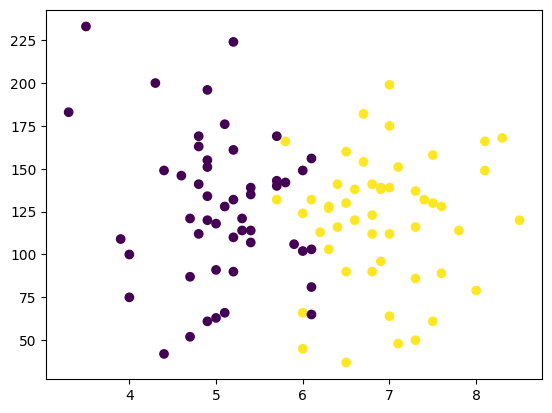

In [9]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

# Extract Input and Output Columns

In [10]:
X = df.iloc[:, 0:2] # df['cgpa', 'iq']
y = df.iloc[:, -1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Scale The Values

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale = StandardScaler()

In [15]:
X = scale.fit_transform(X, y)

In [16]:
#X

In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 41)

In [20]:
# X_train

# Train The Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()

In [23]:
clf.fit(X_train, y_train)

LogisticRegression()

# Evaluate The Model/ Model Selection

In [24]:
y_pred = clf.predict(X_test)

In [25]:
y_test

42    1
94    0
37    1
6     0
79    1
32    1
24    0
0     1
33    0
93    1
Name: placement, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accurary = accuracy_score(y_test, y_pred)

In [28]:
print(accurary * 100, '%')

90.0 %


In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

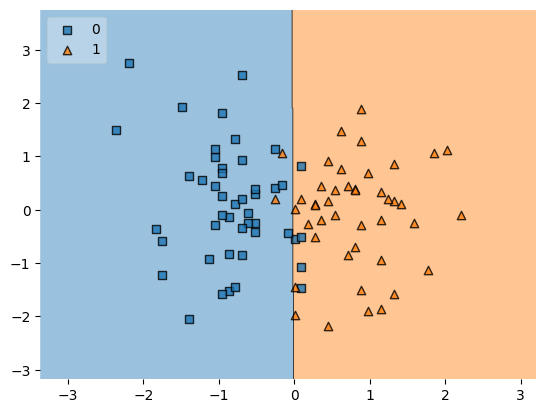

In [30]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend = 2)

# Storing The Model

In [31]:
import pickle

In [32]:
pickle.dump(clf, open('Placement_Prediction_Model.pkl', 'wb'))